In [2]:
import pandas as pd
import sys  
sys.path.insert(0, '../scripts')
import utilities
import seaborn as sn
import matplotlib.pyplot as plt
# import norm_scaling
import loading_data

Perform data exploration to count unique values of categorical variables, make histogram, relational, and other necessary plots to help understand the data. 

## Data Exploration

#### Load data

In [3]:
# load data
df = loading_data.load_csv('../Data/AdSmartABdata.csv')

/home/dibora/Testing-A-B/ab_testing/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  


In [4]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


#### Explore data
After loading data. Collecting information like column names, distribution information, null counts, univariate analysis, plots etc

In [5]:
# column names
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [6]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [7]:
# statistical information about data
df.describe()

,hour,platform_os,yes,no
count,"8,077.00","8,077.00","8,077.00","8,077.00"
mean,11.62,5.95,0.07,0.08
std,5.73,0.22,0.26,0.28
min,0.00,5.00,0.00,0.00
25%,7.00,6.00,0.00,0.00
50%,13.00,6.00,0.00,0.00
75%,15.00,6.00,0.00,0.00
max,23.00,7.00,1.00,1.00


In [8]:
# count null values
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

##### Interpretations
So far Information on the data
- 8077x9 size
- no columns containing missing values
- column names = 
       'auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'
- categorical cols = 
       'auction_id', 'experiment', 'date', 'device_make',
       'browser'

##### Plots

Plotting count of yes column


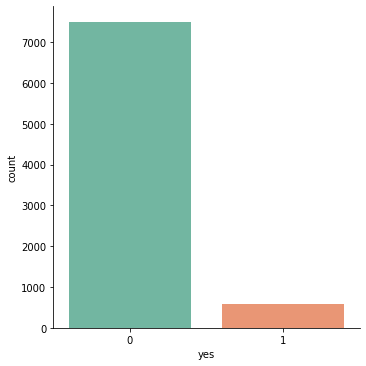

In [9]:
print("Plotting count of yes column")
sn.catplot(data=df,x="yes",kind="count", palette='Set2')

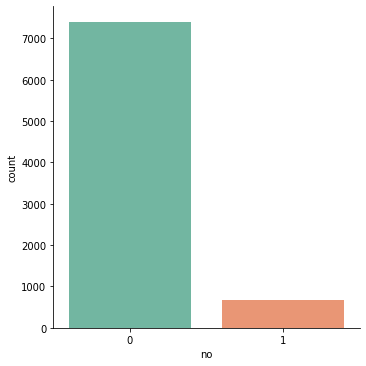

In [10]:
sn.catplot(data=df,x="no",kind="count", palette='Set2')

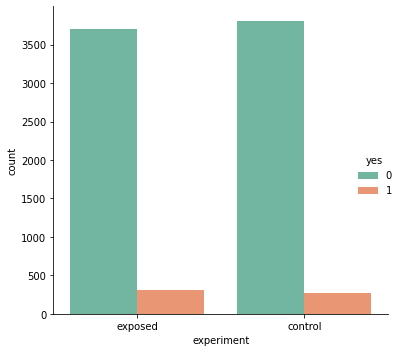

In [11]:
g = sn.catplot(x='experiment', hue = 'yes', data=df,kind='count', palette='Set2')
(g.set_axis_labels("experiment", "count"))
plt.tight_layout()

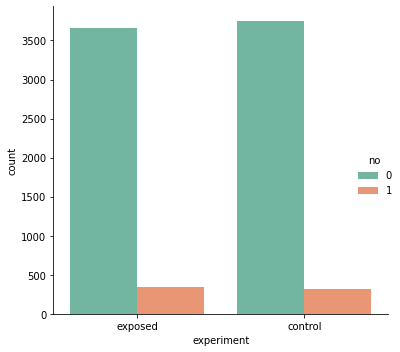

In [12]:
#plotting the number of yes and no values for each experiment group
g = sn.catplot(x='experiment', hue = 'no', data=df,kind='count', palette='Set2')
(g.set_axis_labels("experiment", "count"))
plt.tight_layout()

##### Interpretations
We plotted the count yes/no columns separately. We also plotted each experiment group, with the repect to yes and no columns.
We might need to combine the yes and no columns to see how many people responded and how many didn't.

In [13]:
df_no_response = df[(df["yes"] == 0) & (df["no"] == 0)]
print(df_no_response.count()["yes"]," out of ",df["yes"].count()," didn't give any response")
print(df_no_response[df_no_response["experiment"] == "exposed"].count()["yes"]," out of the exposed group of ",df[df["experiment"] == "exposed"].count()["yes"])
print(df_no_response[df_no_response["experiment"] == "control"].count()["yes"]," out of the control group of ",df[df["experiment"] == "control"].count()["yes"])


6834  out of  8077  didn't give any response
3349  out of the exposed group of  4006
3485  out of the control group of  4071


plotting the number from each group


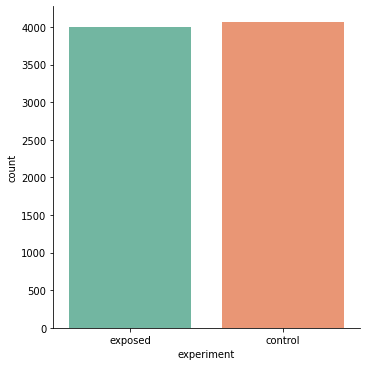

In [14]:
print("plotting the number from each group")
sn.catplot(x='experiment',data=df,kind='count', palette='Set2')

plotting the number with no response from each group


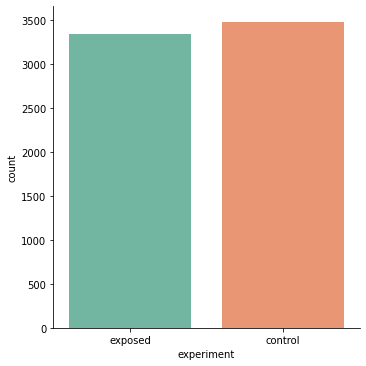

In [15]:
print("plotting the number with no response from each group")
sn.catplot(x='experiment',data=df_no_response,kind='count', palette='Set2')

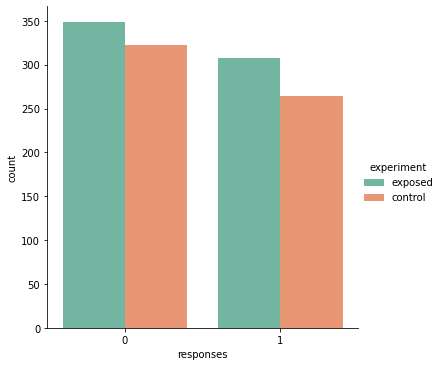

In [28]:
df_response = df[(df["yes"] == 0) ^ (df["no"] == 0)]
# df_response[df_response["experiment"] == "exposed"]
g = sn.catplot(x='yes',hue='experiment',data=df_response,kind='count', palette='Set2')
(g.set_axis_labels("responses", "count"))


For each of the plots you produce, write a description of what the plot shows in markdown cells.
The plots show that most of the data collected contain people who haven't responded. And it is shown that the exposed group has more yes responses than the control group. Just by using this analysis we might be tempted to say the smart ad has brought a positive effect to the branding but This isnot sufficent since this can be caused by chance, or because our sample size is not sufficient. 
We will do further analysis to see if our inference is correct.


### Hyphotehsis Testing

Perform hypothesis testing: apply the classical p-value based algorithm and the  sequential A/B testing algorithm for which a starter code is provided..


#### Classical p-value based algorithm

#### Sequential A/B testing algorithm
A type of algorithm where testing happens in sequence with only one changing factor, which has its advantages since we arenot considering when factors interact. 

#### Interpretations and answers

Are the number of data points in the experiment enough to make a reasonable judgement or should the company run a longer experiment? Remember that running the experiment longer may be costly for many reasons, so you should always optimize the number of samples to make a statistically sound decision.



What does your A/B testing analysis tell you? Is brand awareness increased for the exposed group?